In [1]:
# imports a library 'pandas', names it as 'pd'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

from IPython.display import Image

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline


# various options in pandas
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 400)
pd.set_option('display.precision', 3)

In [2]:
def get_data(week_nums):
    # base url
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = [] #empty list to input weekly turnstile data into
    for week_num in week_nums:
        # concat our week onto url.. 
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [170429, 170506, 170513, 170520, 170527]
df1 = get_data(week_nums)

df1.rename(columns=lambda x: x.strip(), inplace = True)

df1.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/22/2017,00:00:00,REGULAR,6148025,2082120
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/22/2017,04:00:00,REGULAR,6148080,2082123
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/22/2017,08:00:00,REGULAR,6148101,2082157
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/22/2017,12:00:00,REGULAR,6148224,2082251
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/22/2017,16:00:00,REGULAR,6148524,2082316


In [3]:
df1["DATE_TIME"] = pd.to_datetime(df1.DATE + " " +df1.TIME, format="%m/%d/%Y %H:%M:%S")
df1.head(3)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/22/2017,00:00:00,REGULAR,6148025,2082120,2017-04-22 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/22/2017,04:00:00,REGULAR,6148080,2082123,2017-04-22 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/22/2017,08:00:00,REGULAR,6148101,2082157,2017-04-22 08:00:00


In [4]:
df1['DATE'] = pd.to_datetime(df1['DATE'])
df1['DAY_OF_WK'] = df1['DATE'].dt.weekday_name
df1['DAY_OF_WK_N'] = df1['DATE'].dt.weekday

#sort strings in 'linename'

df1['LINENAME'].apply(sorted)

df1['STAT_MERGE'] = df1['STATION'] + '-' + df1['LINENAME']

df1[df1['DAY_OF_WK'] == 'Monday'].head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY_OF_WK,DAY_OF_WK_N,STAT_MERGE
12,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-24,00:00:00,REGULAR,6149971,2082630,2017-04-24 00:00:00,Monday,0,59 ST-NQR456W
13,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-24,04:00:00,REGULAR,6149989,2082631,2017-04-24 04:00:00,Monday,0,59 ST-NQR456W
14,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-24,07:09:01,REGULAR,6150007,2082687,2017-04-24 07:09:01,Monday,0,59 ST-NQR456W
15,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-24,08:00:00,REGULAR,6150056,2082752,2017-04-24 08:00:00,Monday,0,59 ST-NQR456W
16,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-24,12:00:00,REGULAR,6150321,2082986,2017-04-24 12:00:00,Monday,0,59 ST-NQR456W


In [5]:
df1['DELTA_ENTRIES'] = df1['ENTRIES'].diff()
mask = df1.UNIT != df1.UNIT.shift(1)
mask2 = df1.SCP != df1.SCP.shift(1)
df1['DELTA_ENTRIES'][mask] = np.nan
df1['DELTA_ENTRIES'][mask2] = np.nan

df1.head(3)

/Users/krw252/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/krw252/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY_OF_WK,DAY_OF_WK_N,STAT_MERGE,DELTA_ENTRIES
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-22,00:00:00,REGULAR,6148025,2082120,2017-04-22 00:00:00,Saturday,5,59 ST-NQR456W,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-22,04:00:00,REGULAR,6148080,2082123,2017-04-22 04:00:00,Saturday,5,59 ST-NQR456W,55.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-22,08:00:00,REGULAR,6148101,2082157,2017-04-22 08:00:00,Saturday,5,59 ST-NQR456W,21.0


In [6]:
df1['DELTA_EXITS'] = df1['EXITS'].diff()
mask = df1.UNIT != df1.UNIT.shift(1)
mask2 = df1.SCP != df1.SCP.shift(1)
df1['DELTA_EXITS'][mask] = np.nan
df1['DELTA_EXITS'][mask2] = np.nan

df1.head(3)

/Users/krw252/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/krw252/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY_OF_WK,DAY_OF_WK_N,STAT_MERGE,DELTA_ENTRIES,DELTA_EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-22,00:00:00,REGULAR,6148025,2082120,2017-04-22 00:00:00,Saturday,5,59 ST-NQR456W,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-22,04:00:00,REGULAR,6148080,2082123,2017-04-22 04:00:00,Saturday,5,59 ST-NQR456W,55.0,3.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-22,08:00:00,REGULAR,6148101,2082157,2017-04-22 08:00:00,Saturday,5,59 ST-NQR456W,21.0,34.0


In [7]:
df1 = df1[df1.DESC == 'REGULAR']
df1.head(3)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY_OF_WK,DAY_OF_WK_N,STAT_MERGE,DELTA_ENTRIES,DELTA_EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-22,00:00:00,REGULAR,6148025,2082120,2017-04-22 00:00:00,Saturday,5,59 ST-NQR456W,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-22,04:00:00,REGULAR,6148080,2082123,2017-04-22 04:00:00,Saturday,5,59 ST-NQR456W,55.0,3.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-22,08:00:00,REGULAR,6148101,2082157,2017-04-22 08:00:00,Saturday,5,59 ST-NQR456W,21.0,34.0


In [8]:
df1['DELTA_ENTRIES'] = abs(df1['DELTA_ENTRIES'])
df1['DELTA_EXITS'] = abs(df1['DELTA_EXITS'])

In [9]:
df1.sort_values(by ='DELTA_ENTRIES', ascending = False)
df1_filt = df1[df1.DELTA_ENTRIES < 5000]
df1.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY_OF_WK,DAY_OF_WK_N,STAT_MERGE,DELTA_ENTRIES,DELTA_EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-22,00:00:00,REGULAR,6148025,2082120,2017-04-22 00:00:00,Saturday,5,59 ST-NQR456W,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-22,04:00:00,REGULAR,6148080,2082123,2017-04-22 04:00:00,Saturday,5,59 ST-NQR456W,55.0,3.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-22,08:00:00,REGULAR,6148101,2082157,2017-04-22 08:00:00,Saturday,5,59 ST-NQR456W,21.0,34.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-22,12:00:00,REGULAR,6148224,2082251,2017-04-22 12:00:00,Saturday,5,59 ST-NQR456W,123.0,94.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-22,16:00:00,REGULAR,6148524,2082316,2017-04-22 16:00:00,Saturday,5,59 ST-NQR456W,300.0,65.0


In [19]:
#station = df1_filt.groupby(['DAY_OF_WK']).agg({'DELTA_ENTRIES' : sum, 'DELTA_EXITS' :sum})
#station.sort_values('DELTA_ENTRIES',ascending = False)

In [15]:
full = df1_filt.groupby(['DATE_TIME']).DELTA_EXITS.mean() #by date time

In [20]:
#x = np.array([x for x in range(len(station))])
#y = np.array(full)
#plt.xticks(x, my_xticks)
#plt.bar(x, y)

In [21]:
day_wk = df1_filt.groupby(['DAY_OF_WK_N']).DELTA_EXITS.mean() #define day of week groups

<Container object of 7 artists>

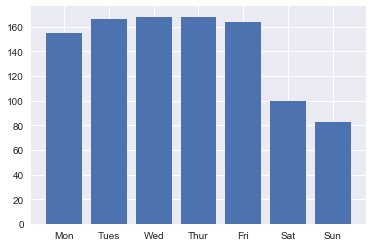

In [22]:
x = np.array([0,1,2,3,4,5,6])
y = np.array(day_wk)
my_xticks = ['Mon', 'Tues', 'Wed','Thur','Fri', 'Sat', 'Sun']
plt.xticks(x, my_xticks)
plt.bar(x, y)

In [23]:
station = df1_filt.groupby(['STAT_MERGE']).DELTA_EXITS.sum().sort_values(ascending=False)
stat_array = station.index.values

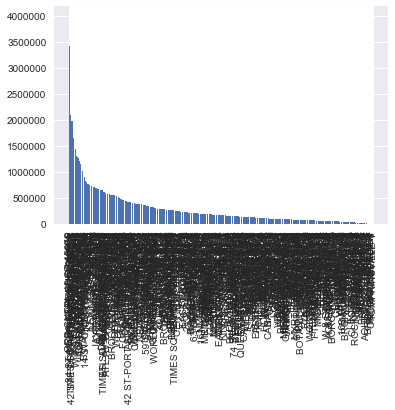

In [24]:
import pylab as pl


x = np.array([x for x in range(len(station))])
y = np.array(station)
my_xticks = stat_array
plt.xticks(x, my_xticks)
plt.bar(x, y)
pl.xticks(rotation = 'vertical')
plt.figure(figsize = (40,10))

In [58]:
def get_time_of_day(string):
    hour = int(string.split(":")[0])
    if hour > 9 and hour <= 13:
        tod = 'Morning'
    elif hour > 13 and hour <= 17:
        tod = 'Afternoon'
    elif hour > 17 and hour <= 21:
        tod = 'Evening'
    elif hour > 21 and hour <= 5
        tod = 'Night'
    else:
        tod = 'Dawn'
    
#    if hour <= 21 and hour > 17: 
#        tod = "Evening"
#    elif hour <= 17 and hour > 13: 
#        tod = "Afternoon"
#    elif hour <= 13 and hour > 9:
#        tod = "Morning"
#    elif hour <= 9 and hour > 5: 
#        tod = "Dawn"
#    else:
#        tod = 'Night' 
#    return tod

df1_filt["TIMEOFDAY"] = df1_filt["TIME"].apply(lambda row: get_time_of_day(row))
b = df1_filt.groupby(["UNIT","STATION", "DAY_OF_WK", "TIME"]).agg({"DELTA_EXITS" : sum})
b.sort_values(by="DELTA_EXITS", ascending=False)
df1_filt['DAY_OF_WK'] = pd.Categorical(df1_filt['DAY_OF_WK'], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
df1_filt['TIMEOFDAY'] = pd.Categorical(df1_filt['TIMEOFDAY'], ['Dawn','Night', 'Evening','Afternoon','Morning'])
df1_filt.head(5)

SyntaxError: invalid syntax (<ipython-input-58-ff24112cc9ff>, line 9)

In [59]:
#grouped_d = df1_filt.groupby(["STAT_MERGE", "DAY_OF_WK", "TIMEOFDAY"], as_index=False).agg({"DELTA_EXITS" : sum})

#def top_five(df1_filt):
#    days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
#    times = ['Dawn', 'Morning', 'Afternoon', 'Evening', 'Night']
#    for day in days:
#        for time in times:
#            mask = ((df1_filt['DAY_OF_WK'] == day) & (df1_filt['TIMEOFDAY'] == time))
#            temp_df = df1_filt[mask].sort_values(by = ['DELTA_EXITS'], ascending = False).reset_index()
#            print(day, time,'\n', temp_df.head())
#			
#top_five(grouped_d)

In [60]:
nqr_59 = df1_filt[df1_filt['STAT_MERGE'] == '59 ST-NQR456W']
#mask = ['STAT_MERGE','C/A','UNIT','SCP','STATION','LINENAME','DIVISION','DATE','TIME','DESC','ENTRIES','DATE_TIME','DAY_OF_WK_N','EXITS','DELTA_ENTRIES']
#nqr_59.drop(mask,axis=1,inplace=True)
nqr_59.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY_OF_WK,DAY_OF_WK_N,STAT_MERGE,DELTA_ENTRIES,DELTA_EXITS,TIMEOFDAY
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-22,04:00:00,REGULAR,6148080,2082123,2017-04-22 04:00:00,Saturday,5,59 ST-NQR456W,55.0,3.0,Night
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-22,08:00:00,REGULAR,6148101,2082157,2017-04-22 08:00:00,Saturday,5,59 ST-NQR456W,21.0,34.0,Dawn
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-22,12:00:00,REGULAR,6148224,2082251,2017-04-22 12:00:00,Saturday,5,59 ST-NQR456W,123.0,94.0,Morning
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-22,16:00:00,REGULAR,6148524,2082316,2017-04-22 16:00:00,Saturday,5,59 ST-NQR456W,300.0,65.0,Afternoon
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-22,20:00:00,REGULAR,6148910,2082368,2017-04-22 20:00:00,Saturday,5,59 ST-NQR456W,386.0,52.0,Evening


In [61]:
#nqr_59['DAY_OF_WK'] = pd.Categorical(nqr_59['DAY_OF_WK'], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
#nqr_59['TIMEOFDAY'] = pd.Categorical(nqr_59['TIMEOFDAY'], ['Dawn','Night', 'Evening','Afternoon','Morning'])

# Load pivot of mean EXITS by TIMEGROUP, DAY_OF_WK
##exits = nqr_59.pivot_table(index = "TIMEOFDAY", columns = "DAY_OF_WK", values = "DELTA_EXITS")

# Draw a heatmap with the numeric values in each cell
##f, ax = plt.subplots(figsize=(9, 6))
##sns.heatmap(exits, annot=True, linewidths=.5, ax=ax,square=True)

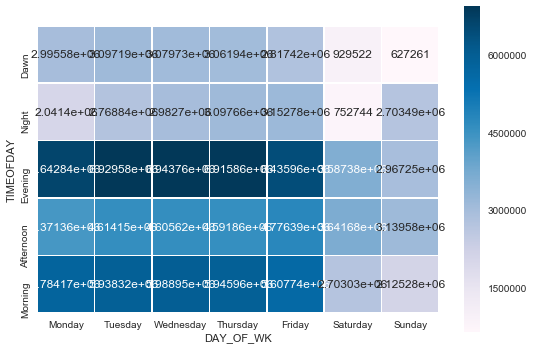

In [106]:
exits = df1_filt.pivot_table(index = "TIMEOFDAY", columns = "DAY_OF_WK", values = "DELTA_EXITS",aggfunc='sum')

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(exits, annot=True, fmt="n", linewidths=.5, ax=ax,square=True, cmap='PuBu')
